Title: Use food diet to predict deaths

Introduction: How can food and healthy diet help to improve healthy life and reduce the death rate? The current study indicated that a healthy diet is very important to prevent various infections. Keeping a healthy immune system is so important. However, little knowledge has been developed about which countries' deaths rate are associated with the different kinds of food intaking, neither do we know what is the importance of food with rich nutrition and improve eating habits to combat spreading diseases. This project uses three different machine learning algorithms to analyze the data of Food_Supply_kcal(percentage of energy intake). The model results should indicate how accurately the food diet can predict the countries' death rate. In addition, the ranking of feature importance should summarize the food and diet from high to low importance to predict deaths.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import MinMaxScaler ## feature scaling

import matplotlib.pyplot as plt # visualization
import seaborn as sns
from termcolor import colored as cl # text customization
import itertools # advanced tools
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px


plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [6]:
data_path = '/Users/Zhang/notebooks/LearningFuze/'
image_path = '/Users/Zhang/notebooks/LearningFuze/output/'

In [7]:
death = pd.read_csv(data_path + 'data/Food_Supply_Quantity_kg_Data.csv')

In [8]:
death.head()

Country  Alcoholic Beverages  Animal fats  Animal Products  \
0          Afghanistan               0.0014       0.1973           9.4341   
1              Albania               1.6719       0.1357          18.7684   
2              Algeria               0.2711       0.0282           9.6334   
3               Angola               5.8087       0.0560           4.9278   
4  Antigua and Barbuda               3.5764       0.0087          16.6613   

   Aquatic Products, Other  Cereals - Excluding Beer    Eggs  Fish, Seafood  \
0                      0.0                   24.8097  0.2099         0.0350   
1                      0.0                    5.7817  0.5815         0.2126   
2                      0.0                   13.6816  0.5277         0.2416   
3                      0.0                    9.1085  0.0587         1.7707   
4                      0.0                    5.9960  0.2274         4.1489   

   Fruits - Excluding Wine    Meat  ...  Vegetables  Vegetal Products  \
0                   5.3495  1.2020  ...      6.7642           40.5645   
1                   6.7861  1.8845  ...     11.7753           31.2304   
2                   6.3801  1.1305  ...     11.6484           40.3651   
3                   6.0005  2.0571  ...      2.3041           45.0722   
4                  10.7451  5.6888  ...      5.4495           33.3233   

   Obesity  Undernourished  Confirmed    Deaths  Recovered    Active  \
0      4.5            29.8   0.142134  0.006186   0.123374  0.012574   
1     22.3             6.2   2.967301  0.050951   1.792636  1.123714   
2     26.6             3.9   0.244897  0.006558   0.167572  0.070767   
3      6.8              25   0.061687  0.001461   0.056808  0.003419   
4     19.1             NaN   0.293878  0.007143   0.190816  0.095918   

   Population  Unit (all except Population)  
0  38928000.0                             %  
1   2838000.0                             %  
2  44357000.0                             %  
3  32522000.0                             %  
4     98000.0                             %  

[5 rows x 32 columns]

In [9]:
death.dtypes

Country                          object
Alcoholic Beverages             float64
Animal fats                     float64
Animal Products                 float64
Aquatic Products, Other         float64
Cereals - Excluding Beer        float64
Eggs                            float64
Fish, Seafood                   float64
Fruits - Excluding Wine         float64
Meat                            float64
Milk - Excluding Butter         float64
Miscellaneous                   float64
Offals                          float64
Oilcrops                        float64
Pulses                          float64
Spices                          float64
Starchy Roots                   float64
Stimulants                      float64
Sugar & Sweeteners              float64
Sugar Crops                     float64
Treenuts                        float64
Vegetable Oils                  float64
Vegetables                      float64
Vegetal Products                float64
Obesity                         float64


In [10]:
death.columns = ['Country', 'Alcoholic_beverages', 'Animal_fats', 'Animal_Products',\
       'Aquatic_Products, Other', 'Cereals_Excluding_Beer', 'Eggs',\
       'Fish_Seafood', 'Fruits_Excluding Wine', 'Meat',\
       'Milk_Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',\
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar_Sweeteners',\
       'Sugar_Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',\
       'Vegetal_Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',\
       'Recovered', 'Active', 'Population', 'Unit']

In [11]:
death.shape

(170, 32)

In [12]:
death.columns

Index(['Country', 'Alcoholic_beverages', 'Animal_fats', 'Animal_Products',
       'Aquatic_Products, Other', 'Cereals_Excluding_Beer', 'Eggs',
       'Fish_Seafood', 'Fruits_Excluding Wine', 'Meat',
       'Milk_Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar_Sweeteners',
       'Sugar_Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal_Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit'],
      dtype='object')

##  data cleaning and preprocessing

In [13]:
death.isnull().sum()

Country                    0
Alcoholic_beverages        0
Animal_fats                0
Animal_Products            0
Aquatic_Products, Other    0
Cereals_Excluding_Beer     0
Eggs                       0
Fish_Seafood               0
Fruits_Excluding Wine      0
Meat                       0
Milk_Excluding Butter      0
Miscellaneous              0
Offals                     0
Oilcrops                   0
Pulses                     0
Spices                     0
Starchy Roots              0
Stimulants                 0
Sugar_Sweeteners           0
Sugar_Crops                0
Treenuts                   0
Vegetable Oils             0
Vegetables                 0
Vegetal_Products           0
Obesity                    3
Undernourished             7
Confirmed                  6
Deaths                     6
Recovered                  6
Active                     8
Population                 0
Unit                       0
dtype: int64

In [14]:
## the provided death is continous variables, so the problems is approaced by the regression model
## the output are numerical variables, so In this questions I used MSE, MAE, RMSE as metrics

In [15]:
### replace null value the mean value
death['Obesity'].fillna((death['Obesity'].mean()), inplace=True)
death['Confirmed'].fillna((death['Confirmed'].mean()), inplace=True)
death['Recovered'].fillna((death['Recovered'].mean()), inplace=True)
death['Deaths'].fillna((death['Deaths'].mean()), inplace=True)

In [16]:
death.head()

Country  Alcoholic_beverages  Animal_fats  Animal_Products  \
0          Afghanistan               0.0014       0.1973           9.4341   
1              Albania               1.6719       0.1357          18.7684   
2              Algeria               0.2711       0.0282           9.6334   
3               Angola               5.8087       0.0560           4.9278   
4  Antigua and Barbuda               3.5764       0.0087          16.6613   

   Aquatic_Products, Other  Cereals_Excluding_Beer    Eggs  Fish_Seafood  \
0                      0.0                 24.8097  0.2099        0.0350   
1                      0.0                  5.7817  0.5815        0.2126   
2                      0.0                 13.6816  0.5277        0.2416   
3                      0.0                  9.1085  0.0587        1.7707   
4                      0.0                  5.9960  0.2274        4.1489   

   Fruits_Excluding Wine    Meat  ...  Vegetables  Vegetal_Products  Obesity  \
0                 5.3495  1.2020  ...      6.7642           40.5645      4.5   
1                 6.7861  1.8845  ...     11.7753           31.2304     22.3   
2                 6.3801  1.1305  ...     11.6484           40.3651     26.6   
3                 6.0005  2.0571  ...      2.3041           45.0722      6.8   
4                10.7451  5.6888  ...      5.4495           33.3233     19.1   

   Undernourished  Confirmed    Deaths  Recovered    Active  Population  Unit  
0            29.8   0.142134  0.006186   0.123374  0.012574  38928000.0     %  
1             6.2   2.967301  0.050951   1.792636  1.123714   2838000.0     %  
2             3.9   0.244897  0.006558   0.167572  0.070767  44357000.0     %  
3              25   0.061687  0.001461   0.056808  0.003419  32522000.0     %  
4             NaN   0.293878  0.007143   0.190816  0.095918     98000.0     %  

[5 rows x 32 columns]

In [17]:
death.shape

(170, 32)

In [18]:
## find the categorical variables
s = (death.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Country', 'Undernourished', 'Unit']


In [19]:
## drop "unit" , "Country"
## process the categorical "Undernourished" 

In [20]:
## observe the value of undernourished
death['Undernourished'].value_counts()

<2.5    44
6.2      3
16.5     3
2.7      3
7.1      3
        ..
37.2     1
7.5      1
6.5      1
9.5      1
17       1
Name: Undernourished, Length: 98, dtype: int64

In [21]:
## replace the min to "2.5"
## since undernourished is string + numerical variables. 
## the min value can be replaced with numerical and undernourished will be numerical variables
## another way is to categorize the variables as the code below. 
## since information is absent for scaling, I used the numerical way. 
death['Undernourished_new'] = death['Undernourished'].str.replace('<2.5','2.5')

In [22]:
death['Undernourished_new'] = pd.to_numeric(death['Undernourished'], errors='coerce')

In [23]:
### use for loop to categorize 
## def f(x):
##    if x == 1: 
##        return 1
##    if (x >= 2.5) & (x < 10):
##        return 2
##    if (x >= 10) & (x < 20):
##        return 3
##    if x >= 20:
##        return 4
##    else:
##        return 'null'
## death['Undernourished_new'] = death.Undernourished_new.apply(f)

In [24]:
death['Undernourished_new'].fillna(death['Undernourished_new'].mean(), inplace=True)

In [25]:
death.Undernourished_new.describe()

count    170.000000
mean      14.457143
std       10.414519
min        2.500000
25%        7.275000
50%       14.457143
75%       14.457143
max       59.600000
Name: Undernourished_new, dtype: float64

In [26]:
death_new = death.drop(['Undernourished','Country','Unit'],axis = 1)

In [27]:
## use other ways to futher clean the data

In [28]:
## further clean the data
death_new.drop_duplicates(inplace=True)

In [29]:
len(death_new.dropna())

162

In [30]:
death_new.dropna(inplace=True)

In [31]:
death_new.isnull().sum()

Alcoholic_beverages        0
Animal_fats                0
Animal_Products            0
Aquatic_Products, Other    0
Cereals_Excluding_Beer     0
Eggs                       0
Fish_Seafood               0
Fruits_Excluding Wine      0
Meat                       0
Milk_Excluding Butter      0
Miscellaneous              0
Offals                     0
Oilcrops                   0
Pulses                     0
Spices                     0
Starchy Roots              0
Stimulants                 0
Sugar_Sweeteners           0
Sugar_Crops                0
Treenuts                   0
Vegetable Oils             0
Vegetables                 0
Vegetal_Products           0
Obesity                    0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
Population                 0
Undernourished_new         0
dtype: int64

In [32]:
death_new.shape ## data ready to use

(162, 30)

In [33]:
death_new.describe

<bound method NDFrame.describe of      Alcoholic_beverages  Animal_fats  Animal_Products  \
0                 0.0014       0.1973           9.4341   
1                 1.6719       0.1357          18.7684   
2                 0.2711       0.0282           9.6334   
3                 5.8087       0.0560           4.9278   
4                 3.5764       0.0087          16.6613   
..                   ...          ...              ...   
165               2.5952       0.0403          14.7565   
166               1.4591       0.1640           8.5765   
167               0.0364       0.0446           5.7874   
168               5.7360       0.0829           6.0197   
169               4.0552       0.0755           8.1489   

     Aquatic_Products, Other  Cereals_Excluding_Beer    Eggs  Fish_Seafood  \
0                     0.0000                 24.8097  0.2099        0.0350   
1                     0.0000                  5.7817  0.5815        0.2126   
2                     0.0000       

In [1]:
## The above results shows the feature scaling varies, like population and acquatic products.. need further feature scaling

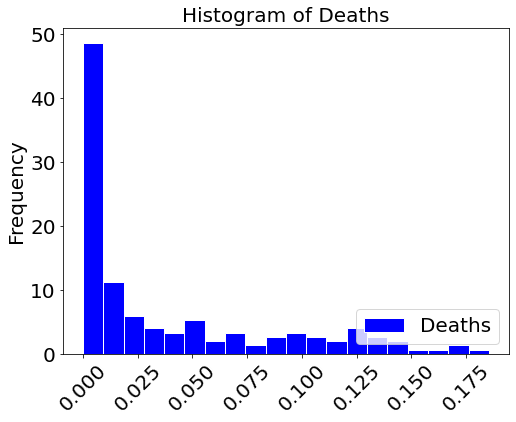

In [35]:
## plot the death rate
death_new.Deaths.plot(kind = 'hist', bins=20,density=True, figsize=(8,6),color = 'b',edgecolor='white', linewidth=1)
plt.title('Histogram of Death',size = 20);
plt.xlabel('',size = 20);
plt.ylabel('Frequency',size = 20);
plt.title('Histogram of Deaths',size = 20);
plt.xticks(size = 20,rotation=45)
plt.yticks(size = 20)
plt.legend(loc=4, prop={'size': 20})
plt.savefig(r'output/age_hist.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
## the distribution are extremely right-skewed, majority of the data are close to "0" 
## use square root for transformation  

## Feature engineering

In [37]:
## correklation matrix
death_new.corr()

Alcoholic_beverages  Animal_fats  Animal_Products  \
Alcoholic_beverages                 1.000000     0.433924         0.351646   
Animal_fats                         0.433924     1.000000         0.633236   
Animal_Products                     0.351646     0.633236         1.000000   
Aquatic_Products, Other             0.060102     0.005328         0.000321   
Cereals_Excluding_Beer             -0.366784    -0.410585        -0.537847   
Eggs                                0.147727     0.275366         0.483142   
Fish_Seafood                       -0.008807    -0.067951        -0.006359   
Fruits_Excluding Wine              -0.196503    -0.241647        -0.205165   
Meat                                0.328021     0.324346         0.585222   
Milk_Excluding Butter               0.265818     0.573629         0.900917   
Miscellaneous                      -0.006880    -0.062259         0.079161   
Offals                              0.000236    -0.032298         0.114030   
Oilcrops                           -0.158279    -0.158425        -0.253903   
Pulses                             -0.207427    -0.342981        -0.442456   
Spices                             -0.083472    -0.178545        -0.184567   
Starchy Roots                      -0.064524    -0.214324        -0.518404   
Stimulants                          0.043901     0.259924         0.309943   
Sugar_Sweeteners                    0.120665     0.168768         0.268206   
Sugar_Crops                        -0.197143    -0.123708        -0.139790   
Treenuts                           -0.105772     0.047142         0.087807   
Vegetable Oils                     -0.097642    -0.145675        -0.053824   
Vegetables                         -0.270554    -0.013748         0.073080   
Vegetal_Products                   -0.351720    -0.633128        -1.000000   
Obesity                             0.154923     0.374338         0.543293   
Confirmed                           0.362384     0.494776         0.593105   
Deaths                              0.404866     0.497139         0.537762   
Recovered                           0.262248     0.388815         0.414246   
Active                              0.250366     0.299180         0.436103   
Population                         -0.099160    -0.097362         0.002157   
Undernourished_new                  0.036051    -0.115072        -0.266866   

                         Aquatic_Products, Other  Cereals_Excluding_Beer  \
Alcoholic_beverages                     0.060102               -0.366784   
Animal_fats                             0.005328               -0.410585   
Animal_Products                         0.000321               -0.537847   
Aquatic_Products, Other                 1.000000               -0.009767   
Cereals_Excluding_Beer                 -0.009767                1.000000   
Eggs                                    0.073471               -0.218580   
Fish_Seafood                            0.168633               -0.017623   
Fruits_Excluding Wine                  -0.042335               -0.294906   
Meat                                    0.071402               -0.428077   
Milk_Excluding Butter                  -0.096266               -0.443103   
Miscellaneous                          -0.047654               -0.122173   
Offals                                  0.025688                0.060426   
Oilcrops                                0.025703               -0.016253   
Pulses                                 -0.076116                0.319208   
Spices                                 -0.030962                0.173201   
Starchy Roots                          -0.067925               -0.100981   
Stimulants                             -0.045133               -0.092163   
Sugar_Sweeteners                       -0.016951               -0.142123   
Sugar_Crops                            -0.021012                0.187705   
Treenuts                                0.025005               -0.058010   
Vegetable 

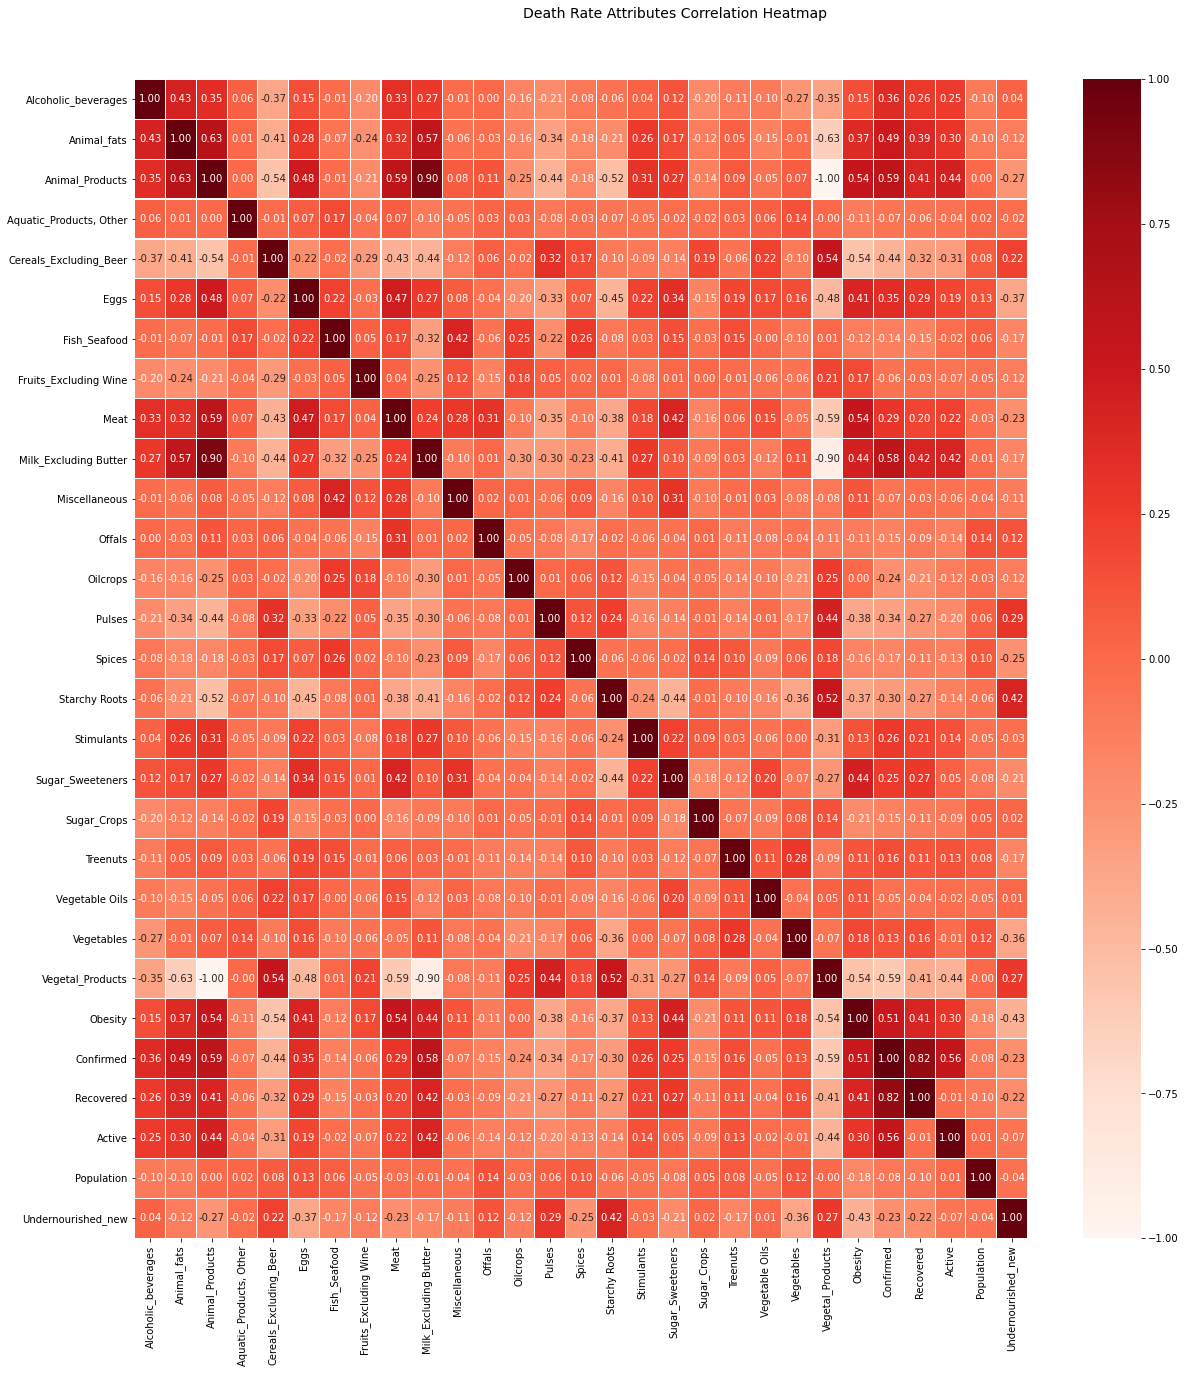

In [38]:
# for visualizing correlations
f, ax = plt.subplots(figsize=(20, 20))
corr = death_new.drop(['Deaths'],axis = 1).corr()
sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Reds",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
title = f.suptitle('Death Rate Attributes Correlation Heatmap', fontsize=14)

In [39]:
## there are no variables that have a strong correlation to all other variables. Therefore all variables are in the analysis
## the results show strong correlations such as confirmed, active and vegetable products
## other strong correlations such as cereals beers to Alcoholic, Miscellaneous and confirmed
## the results show the poor correlations such as animal products and Miscellaneous

## Train the data 

In [40]:
# visualize a minmax scaler transform of the dataset
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [41]:
# split into inputs and outputs
feature_cols = death_new.columns.drop(['Deaths'])
X = death_new[feature_cols]

# Create response vector (y)
y = death_new.Deaths

In [42]:
## transform the features 
X = StandardScaler().fit_transform(X)

In [43]:
## use logarithmic to transform the y which is extremely skewed. 
y_trans = np.sqrt(y)

In [ ]:
## from sklearn.preprocessing import MinMaxScaler
## y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1))

In [ ]:
## transforamtion log square root
## to estimate, exp()

In [44]:
print(X.shape, y_trans.shape)

(162, 29) (162,)


In [45]:
## Create the train/test split.
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, train_size=0.8 ,random_state=99)

In [46]:
X_train.shape

(129, 29)

In [47]:
X_test.shape

(33, 29)

In [48]:
y_train.shape

(129,)

In [49]:
y_test.shape

(33,)

## Machine Learning

In [50]:
## Ridge regression
## optimal value of alpha for ridge regression when All coefficients zero, intercept score

In [51]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

30.36771118035459


In [52]:
## calculate R2 of ridge regression
## R2 is high in model looks good

train_preds = optimal_ridge.predict(X_train)
optimal_ridge.score(X_train, y_train)

0.7965181812120233

## cross-validate score

In [53]:
## calculate 10 folds Cross validation score and mean 
ridge_scores = cross_val_score(optimal_ridge, X_train, y_train, cv=10)

print(ridge_scores)
print(np.mean(ridge_scores))

[0.69550047 0.47157677 0.68375667 0.55410032 0.78349861 0.73532483
 0.97805967 0.51176456 0.49372232 0.74108159]
0.6648385819318452


## Model Evaluation

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# use mean squared error, mean absolute error and R2 to evaluate the model.
def show_scores(model, X_train, X_test, y_train, y_test):    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Test MAE': mean_absolute_error(y_test, test_preds),
              'Training MSE': mean_squared_error(y_train, train_preds),
              'Test MSE': mean_squared_error(y_test, test_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Test R^2': r2_score(y_test, test_preds)}
    return scores

In [55]:
show_scores(optimal_ridge, X_train, X_test , y_train, y_test)

{'Training MAE': 0.040523980899040454,
 'Test MAE': 0.04712884384545657,
 'Training MSE': 0.002915215754985201,
 'Test MSE': 0.0035512516031912336,
 'Training R^2': 0.7965181812120233,
 'Test R^2': 0.8019102492715857}

In [56]:
## use other models
## create pipeline
from sklearn.pipeline import Pipeline

regressor = Pipeline([
    ('scaler', StandardScaler()),
    ('estimator', Ridge(random_state=28))
])

## Machine learning 

In [57]:
## introduced other models of Support vector regressor and random forest
## remove SRV replace KNN or Decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# First, we create a dict with our desired models
models = {'Ridge':Ridge(random_state=28),
          'Tree_model':DecisionTreeRegressor(max_depth=3, random_state=1),
          'RandomForest':RandomForestRegressor(),
          'XGBoost':XGBRegressor(n_estimators = 1000, learning_rate = 0.05)}

# Now to build the function that tests each model
def model_build(model, X_train, y_train, X_test, y_test, scale=True):
    
    if scale:
        regressor = Pipeline([
            ('scaler', StandardScaler()),
            ('estimator', model)
        ])
    
    else:
        regressor = Pipeline([
            ('estimator', model)
        ])

    # Training
    regressor.fit(X_train, y_train)

    # Scoring the training set

    train_preds = regressor.predict(X_train)
    print(f"R2 on single split: {regressor.score(X_train, y_train)}")

    # Cross validate
    cv_score = cross_val_score(regressor, X_train, y_train, cv = 10)

    print(f"Cross validate R2 score: {cv_score.mean()}")

    # Scoring the test set
    for k, v in show_scores(regressor, X_train, X_test , y_train, y_test).items():
        print("     ", k, v)

In [58]:
## print out MAE, MSE, R2 of three models
for name, model in models.items():
    print(f"==== Scoring {name} model====")
    
    if name == 'RandomForest' or name == 'XGBoost' or name == 'Tree_model':
        model_build(model, X_train, y_train, X_test, y_test, scale=False)
    else:
        model_build(model, X_train, y_train, X_test, y_test,)
    print()
    print(40*"=")

==== Scoring Ridge model====
R2 on single split: 0.8124245223869887
Cross validate R2 score: 0.3919834789170463
      Training MAE 0.03857228641175126
      Test MAE 0.054205418755947664
      Training MSE 0.002687330941129937
      Test MSE 0.004710726811744006
      Training R^2 0.8124245223869887
      Test R^2 0.7372344164380014

==== Scoring Tree_model model====
R2 on single split: 0.9131929989271381
Cross validate R2 score: 0.7035976265534025
      Training MAE 0.026019425475613783
      Test MAE 0.04481547960948823
      Training MSE 0.0012436547829086787
      Test MSE 0.004073215006498119
      Training R^2 0.9131929989271381
      Test R^2 0.7727949930172833

==== Scoring RandomForest model====
R2 on single split: 0.9762874291078611
Cross validate R2 score: 0.7740692735313153
      Training MAE 0.012782556785800333
      Test MAE 0.036550666777351505
      Training MSE 0.00033972204822876976
      Test MSE 0.0026455966958288035
      Training R^2 0.9762874291078611
      Test

In [77]:
## calculate the RMSE of all models
Ridge_RMSE = np.sqrt(0.004710726811744006)
Tree_RMSE = np.sqrt(0.004073215006498119)
RF_RMSE = np.sqrt(0.0026455966958288035)
XGBoost_RMSE = np.sqrt(0.003034460330831356)

In [78]:
print(Ridge_RMSE)
print(Tree_RMSE)
print(RF_RMSE)
print(XGBoost_RMSE)

0.06863473473208741
0.0638217439944892
0.05143536425290292
0.05508593587143052


In [61]:
## the results indicate the XGboosting has the lowest test RMSE and test MAE
## the next is to hyperparameters tunning for XGBoosting

## Hyperparameters Tunning

In [79]:
## set up the pamareters for regression

xgb = XGBRegressor()

parameters = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 1000]}

In [80]:
## use grid serve to find the best grid

from sklearn.model_selection import GridSearchCV

xgb_grid = GridSearchCV(xgb, parameters, cv = 5, n_jobs = 4, verbose = True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.8160060853703651
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:squarederror', 'subsample': 0.7}


In [64]:
xgb_best = XGBRegressor(colsample_bytree = 0.7,
                        learning_rate = 0.05,
                        max_depth = 5,
                        min_child_weight = 4,
                        n_estimators = 1000,
                        nthread = 4,
                        objective = 'reg:squarederror',
                        subsample = 0.7)

In [81]:
model_build(xgb_best, X_train, y_train, X_test, y_test, scale=False)

R2 on single split: 0.9999892957100863
Cross validate R2 score: 0.7652098308783224
      Training MAE 0.00028740662751354745
      Test MAE 0.03553743053660788
      Training MSE 1.5335677058625871e-07
      Test MSE 0.0026104127632680177
      Training R^2 0.9999892957100863
      Test R^2 0.8543904878186163


In [82]:
## calculate RMSE
Test_RMSE = np.sqrt(0.0026104127632680177)
print(Test_RMSE)

0.051092198653688976


In [83]:
## plot feature importance graph

In [84]:
## re-define the tree model
Tree_model = DecisionTreeRegressor(max_depth=3, random_state=1)
Tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [85]:
def plot_feature_importance(importance,names,model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    df = pd.DataFrame(data)

    df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=df['feature_importance'], y=df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [86]:
## feature importance of XGboosting
pd.DataFrame({'feature':feature_cols, 'importance':xgb_best.feature_importances_}).sort_values(by = 'importance', ascending = False)

feature  importance
24                Confirmed    0.511461
25                Recovered    0.140178
26                   Active    0.100948
9     Milk_Excluding Butter    0.024808
2           Animal_Products    0.021917
0       Alcoholic_beverages    0.019346
23                  Obesity    0.018556
3   Aquatic_Products, Other    0.013735
14                   Spices    0.013439
27               Population    0.012495
7     Fruits_Excluding Wine    0.011196
8                      Meat    0.010230
10            Miscellaneous    0.009274
6              Fish_Seafood    0.009211
28       Undernourished_new    0.008523
17         Sugar_Sweeteners    0.008042
15            Starchy Roots    0.007918
4    Cereals_Excluding_Beer    0.007822
20           Vegetable Oils    0.007349
11                   Offals    0.006425
13                   Pulses    0.006043
12                 Oilcrops    0.005265
16               Stimulants    0.005263
22         Vegetal_Products    0.004999
1               Animal_fats    0.004296
21               Vegetables    0.004254
19                 Treenuts    0.003486
5                      Eggs    0.002472
18              Sugar_Crops    0.001051

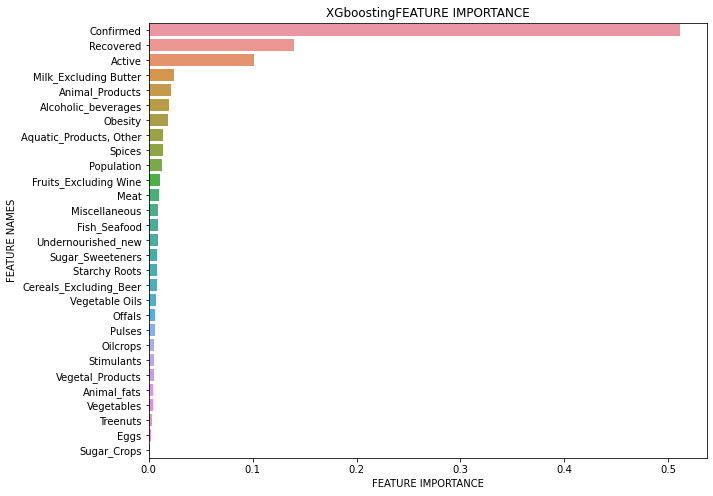

In [87]:
plot_feature_importance(xgb_best.feature_importances_,feature_cols,'XGboosting')

In [88]:
## feature importance of tree
pd.DataFrame({'feature':feature_cols, 'importance':Tree_model.feature_importances_}).sort_values(by = 'importance', ascending = False)

feature  importance
24                Confirmed    0.953770
3   Aquatic_Products, Other    0.026582
4    Cereals_Excluding_Beer    0.012880
25                Recovered    0.006769
0       Alcoholic_beverages    0.000000
16               Stimulants    0.000000
27               Population    0.000000
26                   Active    0.000000
23                  Obesity    0.000000
22         Vegetal_Products    0.000000
21               Vegetables    0.000000
20           Vegetable Oils    0.000000
19                 Treenuts    0.000000
18              Sugar_Crops    0.000000
17         Sugar_Sweeteners    0.000000
14                   Spices    0.000000
15            Starchy Roots    0.000000
1               Animal_fats    0.000000
13                   Pulses    0.000000
12                 Oilcrops    0.000000
11                   Offals    0.000000
10            Miscellaneous    0.000000
9     Milk_Excluding Butter    0.000000
8                      Meat    0.000000
7     Fruits_Excluding Wine    0.000000
6              Fish_Seafood    0.000000
5                      Eggs    0.000000
2           Animal_Products    0.000000
28       Undernourished_new    0.000000

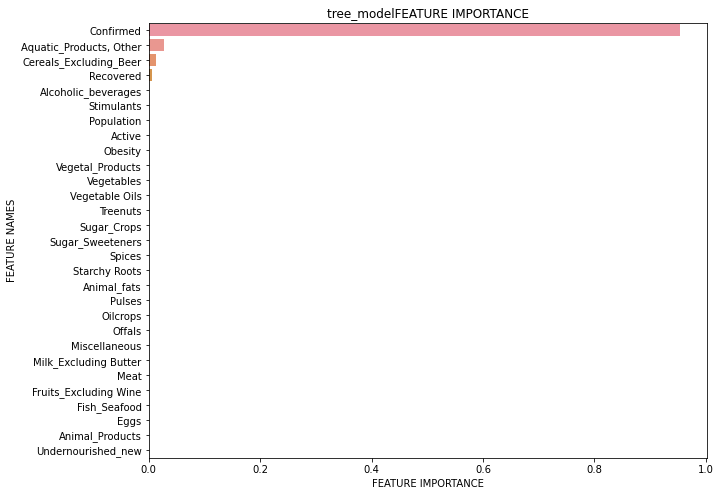

In [89]:
plot_feature_importance(Tree_model.feature_importances_,feature_cols,'tree_model')

In [90]:
## create tree graph

In [91]:
from sklearn.tree import export_graphviz
from sklearn import tree

export_graphviz(Tree_model, out_file='tree.dot', feature_names=feature_cols)

In [92]:
import pydotplus 

tree = tree.export_graphviz(Tree_model, out_file=None) 
graph = pydotplus.graph_from_dot_data(tree) 
graph.write_jpg("output/food_deaths_tree.jpg") 

True

## Conclusion and Next step

The purpose of the study is to use the food diet and nutrition of countries to predict the death rate. The current study used four machine learning algorithms to predict the results.
The ridge regression results show the 10 folds cross-validation score is relatively high in the range of .48 ~.98. the average cross-validation score is .66. Test data MAE .047, and test MSE is 0.004. 
In comparing other three different models including decision tree, random forest, ensembled random forest, and XGboosting, the results of XGboosting seems the best with the lowest RMAE(the root of mean absolute error) and RMSE (root fo mean squared error). 
Further hyperparameter tunning is applied. The grid search is used to find the best parameter. The results of XGboosting indicated the test RMSE  =0.05. 
The feature importance was the plot for the decision tree and XGboosting. 
The XGBoosting model shows the ranking of the important features are confirmed, recovered, Active, Fruit_excluding wines and Milk_excluding butter, etc. The decision tree shows the ranking of the important features are confirmed, Acquatic_product, undernourished and recovered, etc. The decision tree shows that when the confirmed rate <-.238, the predicted deaths are likely to die. on the nodes when the recovered of value -.09, 79 samples are assigned in this group. Among them 68 cases predicted deaths are more likely to die if the confirmed <.-753, on the other hand, the leftover 11 cases who are predicted deaths are likely to be dead when the fruit_excluding wine is <.023

## Next step

From the results of the decision tree and XGboosting results, only a few features are important such as confirmed, Aquatic_products,  undernourished, and recovery. Next step I will continue to adjust the models by using only use the top features and rerun the model to improve the model fit.  